In [2]:
pip install astroNN

Defaulting to user installation because normal site-packages is not writeable
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   --- ------------------------------------ 0.9/9.3 MB 28.4 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.3 MB 22.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.3 MB 22.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.3 MB 22.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.3 MB 22.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.3 MB 22.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.3 MB 22.0 MB/s eta 0:00:01
   --

  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import h5py
import numpy as np
from tensorflow.keras import utils

# To get the images and labels from file
with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [5]:
pip install scikit-image


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


LOADING AND DISPLAYING THE DATASET

The code defines a function to load and display a few preprocessed images from an HDF5 file containing galaxy images. It preprocesses the images by normalizing pixel values and displays them in grayscale using Matplotlib.

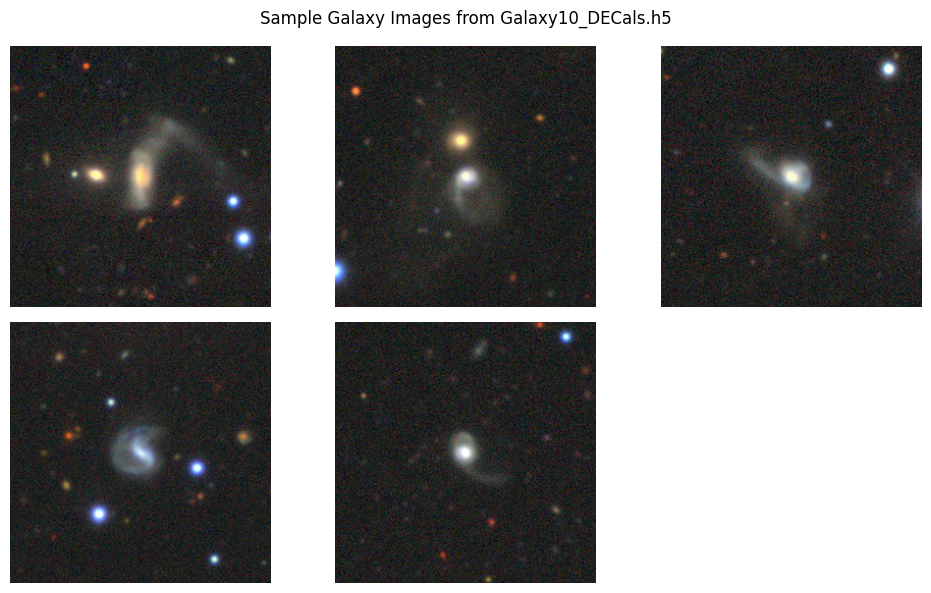

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def view_images(data_file, num_images=5):
    # Loading data from HDF5 file
    with h5py.File(data_file, 'r') as f:
        images = f['images'][:]

    # Preprocess data 
    images = images.astype('float32') / 255.0  

    # Displaying a few images
    plt.figure(figsize=(10, 6))  # Adjusting figure size as desired
    for i in range(num_images):
        plt.subplot(2, 3, i+1)  # Creating a grid of images (2 rows, 3 columns)
        plt.imshow(images[i]) 
        plt.axis('off')  
    plt.suptitle(f'Sample Galaxy Images from {data_file}', fontsize=12)
    plt.tight_layout()
    plt.show()

view_images('Galaxy10_DECals.h5')


Model Training with Data Augmentation

This code defines a convolutional neural network (CNN) model architecture for image classification and utilizes data augmentation techniques during training to improve model generalization. The data augmentation includes random rotations, shifts, shears, zooms, and flips of input images. The model consists of multiple convolutional and pooling layers followed by fully connected layers. After compiling the model with appropriate loss function and optimizer, it is trained using the augmented data generator. Finally, the model is evaluated on a test set to assess its performance in terms of accuracy.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import for data augmentation


datagen = ImageDataGenerator(
    rotation_range=40,  # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically up to 20%
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest')  # Fill mode for padding

# Creating training image data generator
train_generator = datagen.flow(X_train, y_train, batch_size=32)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))  # Added an extra convolutional layer
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Added a dropout layer for regularization
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model with data augmentation
model.fit(train_generator, steps_per_epoch=len(X_train) // 32, epochs=20, validation_data=(X_val, y_val))  # Increased epochs

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/20


c:\Users\MRITYUNJAI RATHORE\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


266/266 ━━━━━━━━━━━━━━━━━━━━ 143s 529ms/step - accuracy: 0.1214 - loss: 2.2569 - val_accuracy: 0.1555 - val_loss: 2.2169
Epoch 2/20


c:\Users\MRITYUNJAI RATHORE\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1555 - val_loss: 2.2169
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 144s 530ms/step - accuracy: 0.1400 - loss: 2.2314 - val_accuracy: 0.1555 - val_loss: 2.2219
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1555 - val_loss: 2.2219
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 134s 497ms/step - accuracy: 0.1495 - loss: 2.2285 - val_accuracy: 0.1555 - val_loss: 2.2136
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1555 - val_loss: 2.2136
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 134s 496ms/step - accuracy: 0.1607 - loss: 2.2266 - val_accuracy: 0.1489 - val_loss: 2.2181
Epoch 8/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1489 - val_loss: 2.2181
Epoch 9/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 130s 481ms/step - accuracy:

1.  This code segment preprocesses image data from an HDF5 file containing galaxy images and their corresponding labels. It then splits the data into training, validation, and testing sets using the train_test_split function. A convolutional neural network (CNN) model is defined using the Sequential API from TensorFlow Keras, comprising convolutional layers followed by max-pooling layers and fully connected layers. The model is compiled with the Adam optimizer and trained on the training data for 10 epochs. Finally, the model's performance is evaluated on the test set, and the accuracy is printed. The trained model is saved for future use.









In [11]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def preprocess_data(data_file, image_size=224):
    with h5py.File(data_file, 'r') as f:
        images = np.array(f['images'])
        labels = np.array(f['ans'])  

    # One-hot encode the labels
    labels = to_categorical(labels)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data('Galaxy10_DECals.h5')

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 for 10 galaxy classes 

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

model.save('galaxy10_model.h5')

Epoch 1/10
400/400 [==============================] - 131s 325ms/step - loss: 26.5646 - accuracy: 0.1411 - val_loss: 2.2246 - val_accuracy: 0.1475
Epoch 2/10
400/400 [==============================] - 133s 332ms/step - loss: 2.2202 - accuracy: 0.1488 - val_loss: 2.2205 - val_accuracy: 0.1488
Epoch 3/10
400/400 [==============================] - 134s 335ms/step - loss: 2.2099 - accuracy: 0.1541 - val_loss: 2.2214 - val_accuracy: 0.1525
Epoch 4/10
400/400 [==============================] - 131s 327ms/step - loss: 2.1045 - accuracy: 0.2168 - val_loss: 2.2840 - val_accuracy: 0.1406
Epoch 5/10
400/400 [==============================] - 129s 324ms/step - loss: 1.8711 - accuracy: 0.3118 - val_loss: 2.5176 - val_accuracy: 0.1281
Epoch 6/10
400/400 [==============================] - 139s 348ms/step - loss: 1.6007 - accuracy: 0.4110 - val_loss: 3.0207 - val_accuracy: 0.1309
Epoch 7/10
400/400 [==============================] - 136s 341ms/step - loss: 1.3510 - accuracy: 0.5047 - val_loss: 3.6672 

2.This code prepares galaxy image data from an HDF5 file for classification using a convolutional neural network (CNN). It preprocesses the data by splitting it into training, validation, and test sets, and one-hot encodes the labels. A CNN model with convolutional and pooling layers followed by fully connected layers is defined and compiled with the Adam optimizer. The model is trained for 20 epochs on the training data and evaluated on the test set, with the final test accuracy printed. Finally, the trained model is saved for future use.

In [12]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def preprocess_data(data_file, image_size=224):
    with h5py.File(data_file, 'r') as f:
        images = np.array(f['images'])
        labels = np.array(f['ans'])  # Assuming labels are in 'ans' dataset (check your file)

    # One-hot encode the labels
    labels = to_categorical(labels)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data('Galaxy10_DECals.h5')

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

model.save('galaxy10_model.h5')

Epoch 1/20
400/400 [==============================] - 114s 284ms/step - loss: 12.4953 - accuracy: 0.1423 - val_loss: 2.2443 - val_accuracy: 0.1510
Epoch 2/20
400/400 [==============================] - 111s 276ms/step - loss: 2.0568 - accuracy: 0.2588 - val_loss: 2.3269 - val_accuracy: 0.1394
Epoch 3/20
400/400 [==============================] - 111s 277ms/step - loss: 1.4462 - accuracy: 0.5014 - val_loss: 2.7210 - val_accuracy: 0.1347
Epoch 4/20
400/400 [==============================] - 111s 277ms/step - loss: 0.6202 - accuracy: 0.8054 - val_loss: 4.1324 - val_accuracy: 0.1319
Epoch 5/20
400/400 [==============================] - 111s 278ms/step - loss: 0.1909 - accuracy: 0.9549 - val_loss: 6.6488 - val_accuracy: 0.1347
Epoch 6/20
400/400 [==============================] - 110s 276ms/step - loss: 0.1057 - accuracy: 0.9789 - val_loss: 8.3169 - val_accuracy: 0.1365
Epoch 7/20
400/400 [==============================] - 110s 275ms/step - loss: 0.0652 - accuracy: 0.9881 - val_loss: 7.8076 

3.In this code, a Convolutional Neural Network (CNN) model is constructed for image classification using the Galaxy10 dataset. The model architecture consists of multiple convolutional layers followed by max-pooling layers to extract hierarchical features from the input images. The convolutional layers use the "tanh" activation function to introduce non-linearity. Dropout layers are incorporated after the max-pooling layers for regularization, preventing overfitting during training. The model is trained for 20 epochs using the Adam optimizer with a learning rate of 0.001. After training, the model achieves a certain accuracy on the test set. This architecture aims to learn the complex patterns present in the galaxy images and classify them into one of the ten different classes represented in the dataset. The trained model is saved for future use.

In [59]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def preprocess_data(data_file, image_size=224):
    with h5py.File(data_file, 'r') as f:
        images = np.array(f['images'])
        labels = np.array(f['ans'])  

    labels = to_categorical(labels)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data('Galaxy10_DECals.h5')

# Define the input shape based on the shape of your input images
input_shape = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='tanh', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

model.save('galaxy10_model.h5')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)       

In [61]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def preprocess_data(data_file, image_size=224):
    with h5py.File(data_file, 'r') as f:
        images = np.array(f['images'])
        labels = np.array(f['ans'])  # Assuming labels are in 'ans' dataset (check your file)

    # One-hot encode the labels
    labels = to_categorical(labels)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

def build_model_1(input_shape):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), activation='tanh', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

def build_model_2(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

def evaluate_model(model, X_test, y_test):
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', test_acc)

# Preprocess data
X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data('Galaxy10_DECals.h5')

# Define input shape based on the shape of input images
input_shape = X_train.shape[1:]

# Build and compile Model 1
model_1 = build_model_1(input_shape)
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train Model 1
model_1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Model 1
print("Model 1 Performance:")
evaluate_model(model_1, X_test, y_test)

# Build and compile Model 2
model_2 = build_model_2(input_shape)
model_2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train Model 2
model_2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Model 2
print("Model 2 Performance:")
evaluate_model(model_2, X_test, y_test)


Epoch 1/5
400/400 [==============================] - 233s 581ms/step - loss: 2.6720 - accuracy: 0.1159 - val_loss: 2.2279 - val_accuracy: 0.1475
Epoch 2/5
400/400 [==============================] - 225s 563ms/step - loss: 2.3990 - accuracy: 0.1173 - val_loss: 2.2240 - val_accuracy: 0.1538
Epoch 3/5
400/400 [==============================] - 195s 487ms/step - loss: 2.2936 - accuracy: 0.1318 - val_loss: 2.2235 - val_accuracy: 0.1538
Epoch 4/5
400/400 [==============================] - 300s 750ms/step - loss: 2.2546 - accuracy: 0.1392 - val_loss: 2.2206 - val_accuracy: 0.1538
Epoch 5/5
399/400 [============================>.] - ETA: 0s - loss: 2.2380 - accuracy: 0.1421

In [ ]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define preprocessing function
def preprocess_data(data_file, image_size=224):
    with h5py.File(data_file, 'r') as f:
        images = np.array(f['images'])
        labels = np.array(f['ans'])  


    labels = to_categorical(labels)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data('Galaxy10_DECals.h5')


datagen = ImageDataGenerator(
    rotation_range=40,  # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically up to 20%
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest')  # Fill mode for padding

# Create training image data generator
train_generator = datagen.flow(X_train, y_train, batch_size=32)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


model.fit(train_generator, steps_per_epoch=len(X_train) // 32, epochs=20, validation_data=(X_val, y_val))  

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


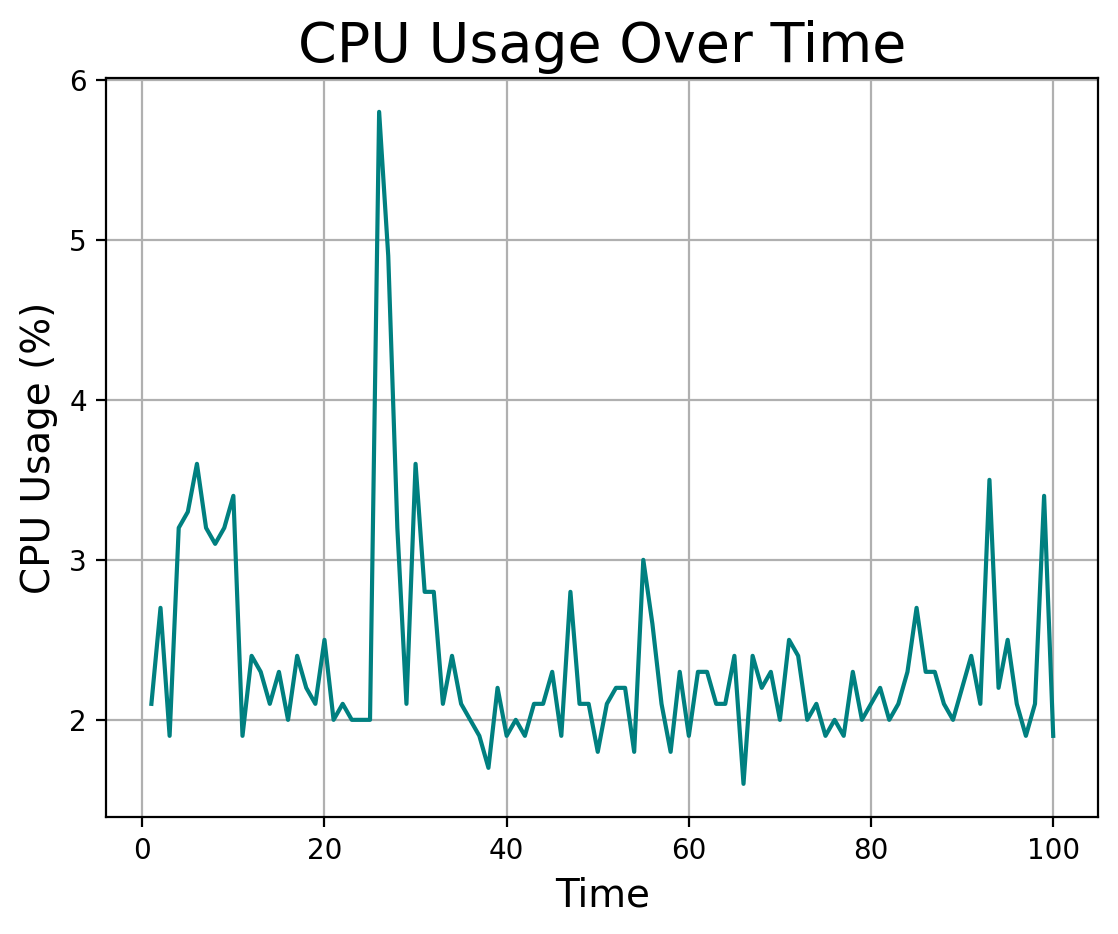

In [13]:
import psutil
import matplotlib.pyplot as plt

# Initialize empty lists to store CPU usage and time data
cpu_percentages = []
timestamps = []

# Number of data points to collect
num_data_points = 100

# Collect CPU usage and time data
for _ in range(num_data_points):
    cpu_percent = psutil.cpu_percent(interval=1)
    timestamp = len(cpu_percentages) + 1  # Use the index as timestamp
    cpu_percentages.append(cpu_percent)
    timestamps.append(timestamp)

# Plot CPU usage over time
fig = plt.figure()
plt.plot(timestamps, cpu_percentages, color='teal')
plt.title('CPU Usage Over Time', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('CPU Usage (%)', fontsize=14)
plt.grid(True)
plt.show()


Epoch 1/10
400/400 [==============================] - 124s 310ms/step - loss: 0.0802 - accuracy: 0.9804 - val_loss: 12.4878 - val_accuracy: 0.1331
Epoch 2/10
400/400 [==============================] - 124s 311ms/step - loss: 0.0533 - accuracy: 0.9864 - val_loss: 13.4814 - val_accuracy: 0.1428
Epoch 3/10
400/400 [==============================] - 129s 322ms/step - loss: 0.1638 - accuracy: 0.9626 - val_loss: 18.0207 - val_accuracy: 0.1469
Epoch 4/10
400/400 [==============================] - 129s 323ms/step - loss: 0.1573 - accuracy: 0.9631 - val_loss: 14.1882 - val_accuracy: 0.1306
Epoch 5/10
400/400 [==============================] - 125s 312ms/step - loss: 0.0464 - accuracy: 0.9891 - val_loss: 14.1095 - val_accuracy: 0.1237
Epoch 6/10
400/400 [==============================] - 132s 329ms/step - loss: 0.0195 - accuracy: 0.9954 - val_loss: 13.0394 - val_accuracy: 0.1228
Epoch 7/10
400/400 [==============================] - 134s 336ms/step - loss: 0.0146 - accuracy: 0.9962 - val_loss: 13

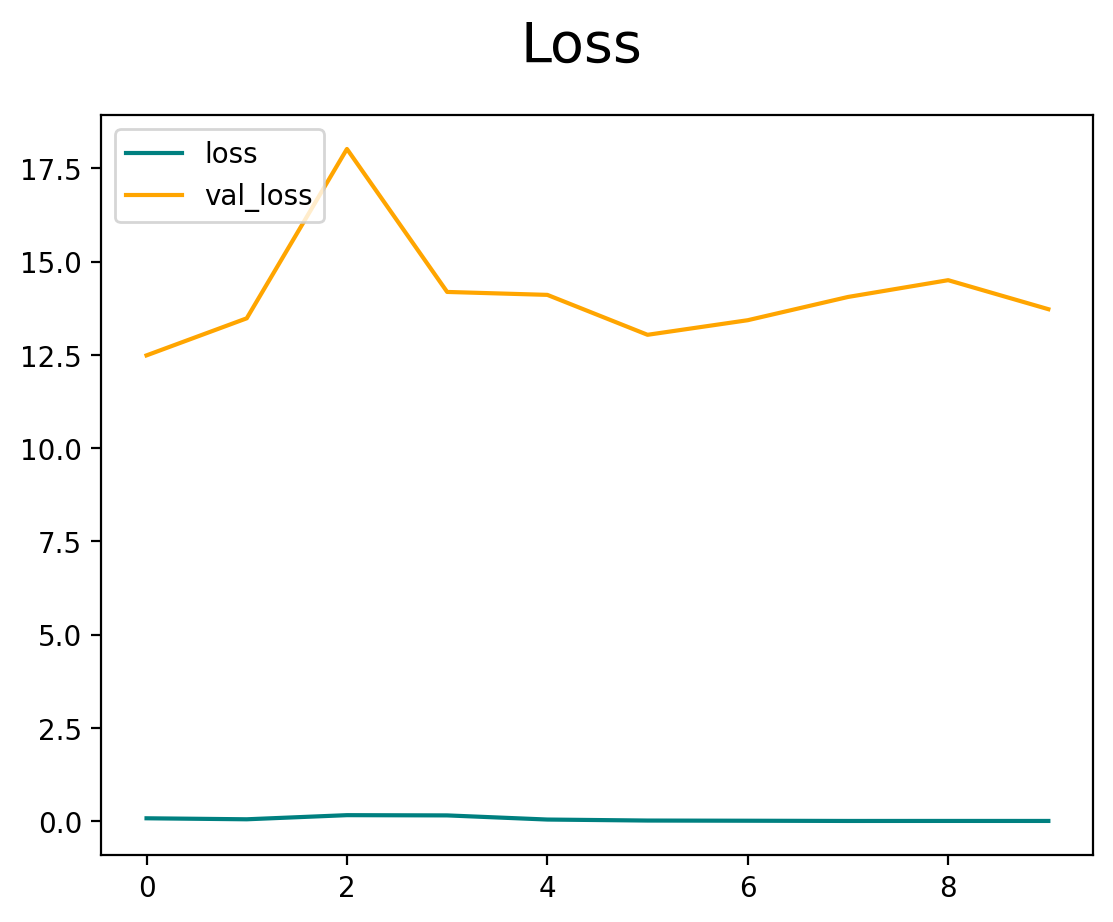

In [15]:
# Train the model and capture the history
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Now you can plot the loss and validation loss using the hist object
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


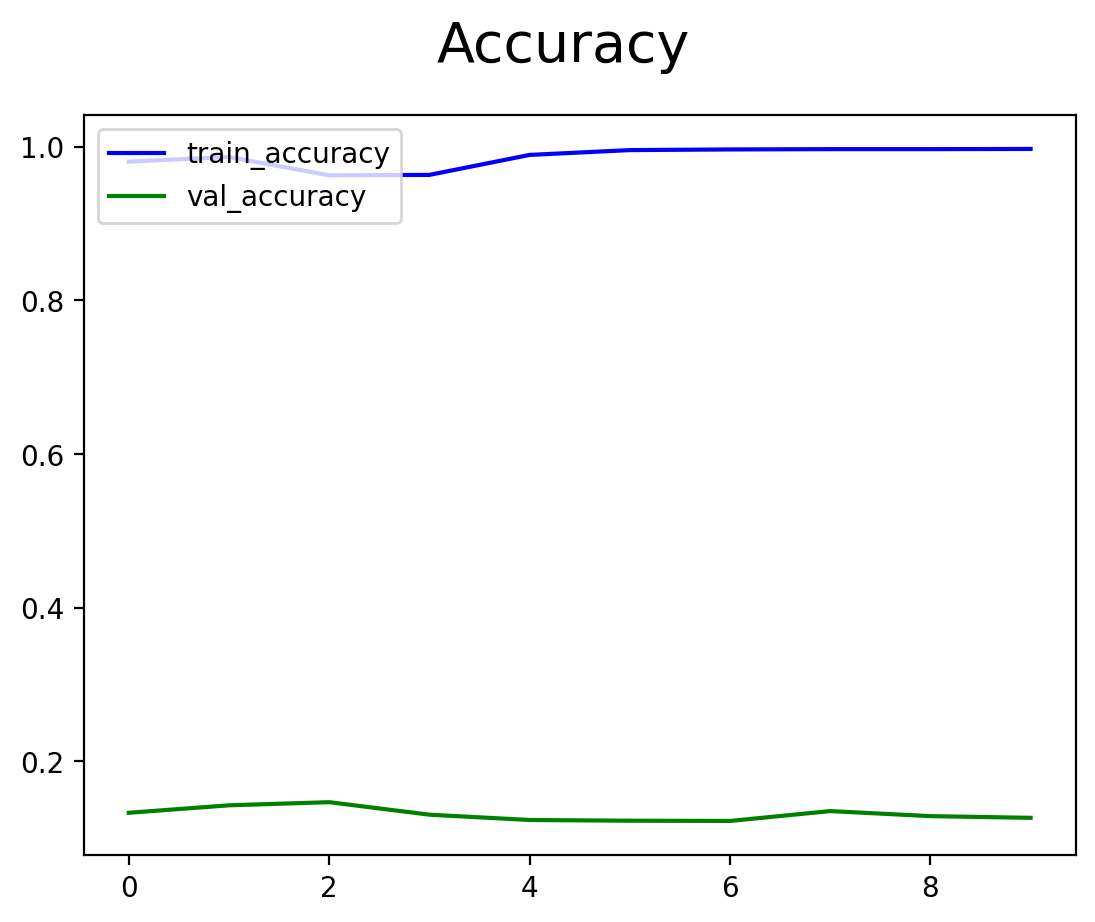

In [49]:
# Plot training accuracy and validation accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='train_accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


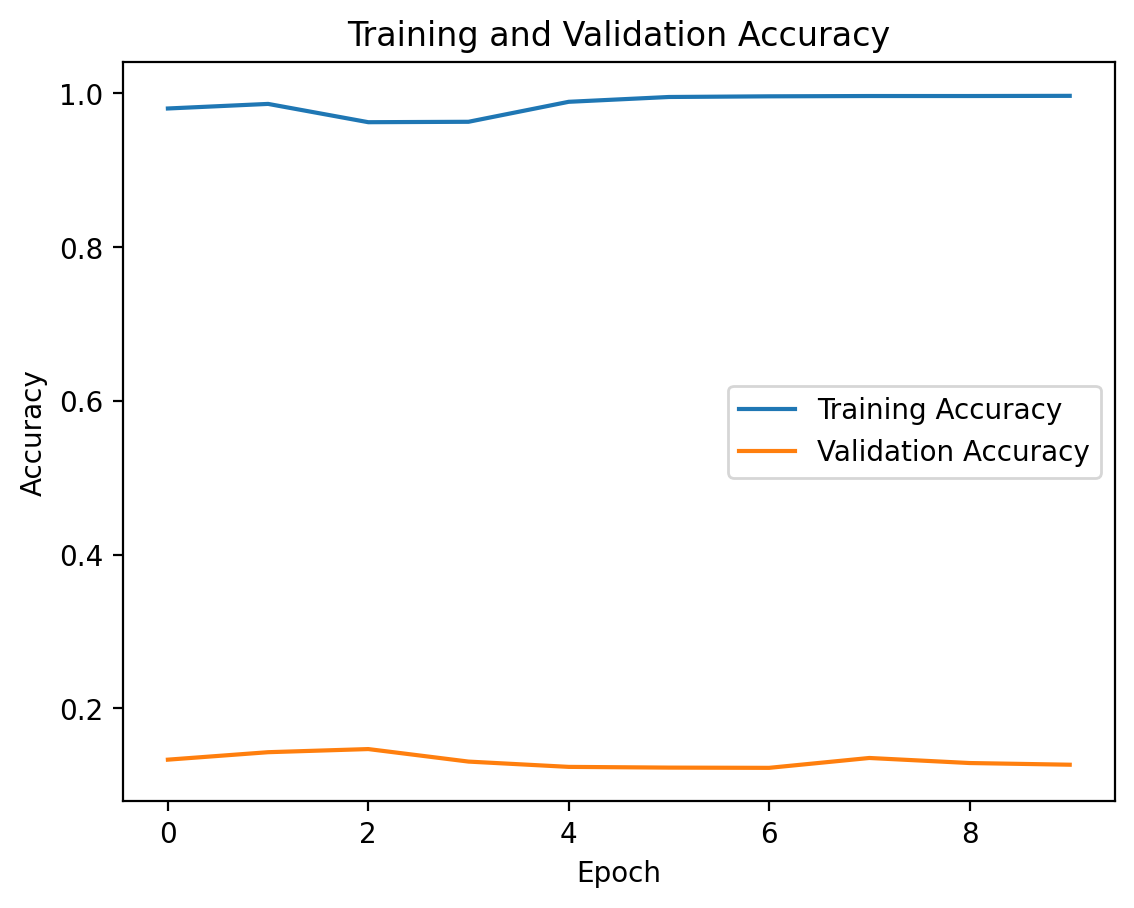

In [55]:
import matplotlib.pyplot as plt

def plot_accuracy(hist):
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Assuming you have already trained your model and stored the history object
# Replace 'history' with your actual history object
plot_accuracy(hist)


In [45]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00


In [24]:
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

# Iterate through each class number and print its corresponding class name
for class_number in range(10):
    class_name = galaxy10cls_lookup(class_number)
    print(f"Class {class_number}: {class_name}")


Class 0: Disturbed
Class 1: Merging
Class 2: Round Smooth
Class 3: Smooth, Cigar shaped
Class 4: Cigar Shaped Smooth
Class 5: Barred Spiral
Class 6: Unbarred Tight Spiral
Class 7: Unbarred Loose Spiral
Class 8: Edge-on without Bulge
Class 9: Edge-on with Bulge


In [28]:
pip install tensorflow pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 0s 44ms/step
The predicted class for the input image is: Unbarred Loose Spiral


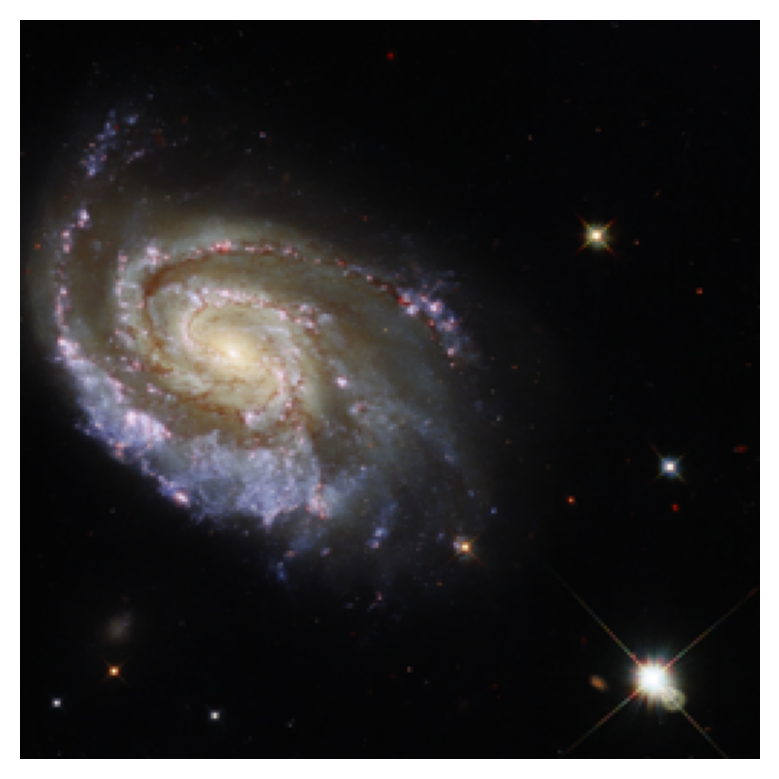

In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

# Step 1: Preprocess the input photo
def preprocess_image(image_path, target_size=(256, 256)):
    # Loading the TIFF image using PIL
    img = Image.open(image_path)
    # Resize the image to the target size
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Normalize the pixel values
    img_array = img_array.astype('float32') / 255.0
    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

# Step 2: Loading our trained model
from tensorflow.keras.models import load_model

model = load_model(r'C:\Users\MRITYUNJAI RATHORE\Downloads\Data Set for ds project\galaxy10_model.h5')  

# Step 3: Using the loaded model to predict the class of the input photo
def predict_class(model, image_path):
    preprocessed_image, img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)
    return predicted_class, img

# Testing the model 
image_path = r'C:\Users\MRITYUNJAI RATHORE\Downloads\Data Set for ds project\heic1305a\potw2144a.tif'
predicted_class, img = predict_class(model, image_path)

# Printing the predicted class name
predicted_class_name = galaxy10cls_lookup(predicted_class)
print(f"The predicted class for the input image is: {predicted_class_name}")

plt.imshow(img)
plt.axis('off')
plt.show()


In [6]:
pip install --upgrade numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade astroNN


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow_probability-0.24.0-py2.py3-none-any.whl.metadata (13 kB)
Using cached tensorflow_probability-0.24.0-py2.py3-none-any.whl (6.9 MB)
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.11.0
    Uninstalling tensorflow-probability-0.11.0:
      Successfully uninstalled tensorflow-probability-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# List of all labels
labels = ['Disturbed Galaxies', 'Merging Galaxies', 'Round Smooth Galaxies', 
          'In-between Round Smooth Galaxies', 'Cigar Shaped Smooth Galaxies',
          'Barred Spiral Galaxies', 'Unbarred Tight Spiral Galaxies',
          'Unbarred Loose Spiral Galaxies', 'Edge-on Galaxies without Bulge',
          'Edge-on Galaxies with Bulge']

# Instantiate LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform all the labels to one-hot encoded vectors
one_hot_labels = label_binarizer.fit_transform(labels)

# Example usage
for label, one_hot_label in zip(labels, one_hot_labels):
    print(f'{label}: {one_hot_label}')


Disturbed Galaxies: [0 0 1 0 0 0 0 0 0 0]
Merging Galaxies: [0 0 0 0 0 0 1 0 0 0]
Round Smooth Galaxies: [0 0 0 0 0 0 0 1 0 0]
In-between Round Smooth Galaxies: [0 0 0 0 0 1 0 0 0 0]
Cigar Shaped Smooth Galaxies: [0 1 0 0 0 0 0 0 0 0]
Barred Spiral Galaxies: [1 0 0 0 0 0 0 0 0 0]
Unbarred Tight Spiral Galaxies: [0 0 0 0 0 0 0 0 0 1]
Unbarred Loose Spiral Galaxies: [0 0 0 0 0 0 0 0 1 0]
Edge-on Galaxies without Bulge: [0 0 0 0 1 0 0 0 0 0]
Edge-on Galaxies with Bulge: [0 0 0 1 0 0 0 0 0 0]
